We import all essentials for data wrangling, modeling, and visualization. Clean visuals make our work interpretable

In [1]:
#core libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Modeling

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ( confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve,classification_report)

#ignore warnings for clean output
import warnings
warnings.filterwarnings('ignore')

#set styles
sns.set(style="whitegrid")

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

100%|██████████| 48.6k/48.6k [00:00<00:00, 4.41MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2


In [4]:
data_url = '/root/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2/data.csv'
df_original = pd.read_csv(data_url)
df = df_original.copy(deep=True)
df.head()
print(df.shape)


(569, 33)


In [5]:
print(df.columns)   # See exact column names
print(df.head())    # Peek at first 5 rows
print(df['diagnosis'].unique())  # If this errors, column name mismatch
# Drop the useless empty column
df = df.drop(columns=['Unnamed: 32'], errors='ignore')
print(df.columns,"\n",df_original.columns)
print(df.head(),"\n",df_original.head())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301        

Quick EDA (Exploratory Data Analysis)

Dataset Shape: -- (569, 32)
Class Distribution diagnosis
B    357
M    212
Name: count, dtype: int64
----------------
Missing values per columm :-- 
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave p

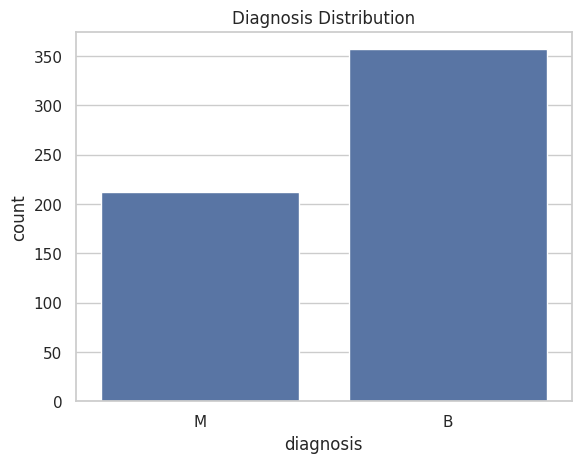

---------------- (569, 32)


In [6]:
print("Dataset Shape: --",df.shape)
print("Class Distribution",df['diagnosis'].value_counts())
print("----------------")
#checking for missing values
print("Missing values per columm :-- \n",df.isnull().sum())
print("----------------")
#Visualize Class Balance
sns.countplot(x='diagnosis',data=df)
plt.title('Diagnosis Distribution')
plt.show()
df.describe().T.head(10)
print("----------------",df.shape)

The Sigmoid Function

Visualizes how raw model output is mapped to probabilities between 0 and 1 (logistic core).
we will get the classic S-curve, crossing 0.5 at z=0.

(569, 32)


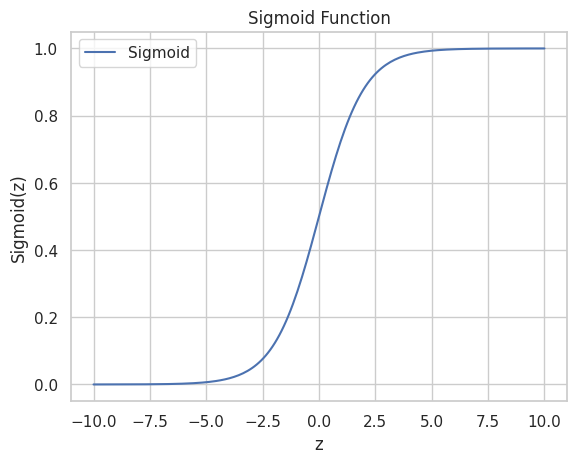

(569, 32)
0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [7]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

z = np.linspace(-10,10,200)
print(df.shape)
plt.plot(z,sigmoid(z),label='Sigmoid')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.legend()
plt.show()
print(df.shape)
print(df['diagnosis'])

In [8]:
print(df.columns)   # See exact column names
print(df.head())    # Peek at first 5 rows
print(df['diagnosis'])  # If this errors, column name mismatch


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42

In [9]:
df = df[df['diagnosis'].isin(['M', 'B'])]
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print(df['diagnosis'].isnull().sum())  # Should be 0
print(df['diagnosis'].unique())        # Should be [0, 1]
print(df.shape)                        # Should show non-zero row count
print(df['diagnosis'])

0
[1 0]
(569, 32)
0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [10]:
# Features/Target split
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [11]:
# Train-Test split (stratified!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(df['diagnosis'].isnull().sum())  # Should be 0
print(df['diagnosis'].unique())        # Should be [0, 1]
print(df.shape)

0
[1 0]
(569, 32)


In [12]:
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(df['diagnosis'].isnull().sum())  # Should be 0
print(df['diagnosis'].unique())        # Should be [0, 1]
print(df.shape)
print(X_test_scaled,X_test_scaled,"\n ------------")

df = df.drop(['Unnamed: 32'], axis=1, errors='ignore')
print(X_test_scaled,X_test_scaled,"\n ------------")
print("hello")
print(df.columns)


0
[1 0]
(569, 32)
[[-0.24307384 -0.77089916 -2.00602473 ... -0.38805702  0.16254727
   0.06095804]
 [-0.24292425  1.89472636  0.96648861 ...  1.42292627  0.33722232
  -0.31041892]
 [-0.24280075  0.56051506 -0.78108791 ...  0.14391558  0.38009711
   0.30174696]
 ...
 [-0.2427264   0.10179251 -0.01812727 ... -0.29280517 -0.70288824
  -0.52310661]
 [-0.24296521  0.26682074 -0.63876192 ...  0.14541325  0.79614133
   0.73153038]
 [-0.1845902   0.53254417  0.05420233 ...  0.54678897 -0.41864428
  -1.11598733]] [[-0.24307384 -0.77089916 -2.00602473 ... -0.38805702  0.16254727
   0.06095804]
 [-0.24292425  1.89472636  0.96648861 ...  1.42292627  0.33722232
  -0.31041892]
 [-0.24280075  0.56051506 -0.78108791 ...  0.14391558  0.38009711
   0.30174696]
 ...
 [-0.2427264   0.10179251 -0.01812727 ... -0.29280517 -0.70288824
  -0.52310661]
 [-0.24296521  0.26682074 -0.63876192 ...  0.14541325  0.79614133
   0.73153038]
 [-0.1845902   0.53254417  0.05420233 ...  0.54678897 -0.41864428
  -1.11598733]

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
print(X_test_scaled,X_test_scaled)
print(df.columns)

[[-0.24307384 -0.77089916 -2.00602473 ... -0.38805702  0.16254727
   0.06095804]
 [-0.24292425  1.89472636  0.96648861 ...  1.42292627  0.33722232
  -0.31041892]
 [-0.24280075  0.56051506 -0.78108791 ...  0.14391558  0.38009711
   0.30174696]
 ...
 [-0.2427264   0.10179251 -0.01812727 ... -0.29280517 -0.70288824
  -0.52310661]
 [-0.24296521  0.26682074 -0.63876192 ...  0.14541325  0.79614133
   0.73153038]
 [-0.1845902   0.53254417  0.05420233 ...  0.54678897 -0.41864428
  -1.11598733]] [[-0.24307384 -0.77089916 -2.00602473 ... -0.38805702  0.16254727
   0.06095804]
 [-0.24292425  1.89472636  0.96648861 ...  1.42292627  0.33722232
  -0.31041892]
 [-0.24280075  0.56051506 -0.78108791 ...  0.14391558  0.38009711
   0.30174696]
 ...
 [-0.2427264   0.10179251 -0.01812727 ... -0.29280517 -0.70288824
  -0.52310661]
 [-0.24296521  0.26682074 -0.63876192 ...  0.14541325  0.79614133
   0.73153038]
 [-0.1845902   0.53254417  0.05420233 ...  0.54678897 -0.41864428
  -1.11598733]]
Index(['id', 'di

MODEL TRAINING
Fit logistic regression. lbfgs is the go-to solver here

In [14]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [15]:
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:,1]


In [20]:
import joblib
joblib.dump(log_reg, 'logistic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

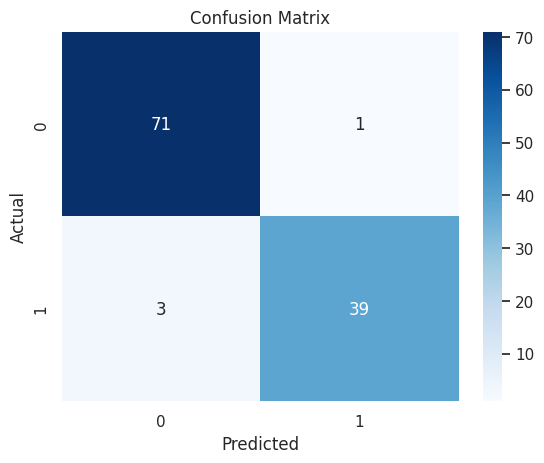

Accuracy: 0.9649122807017544
Precision: 0.975
Recall: 0.9285714285714286
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


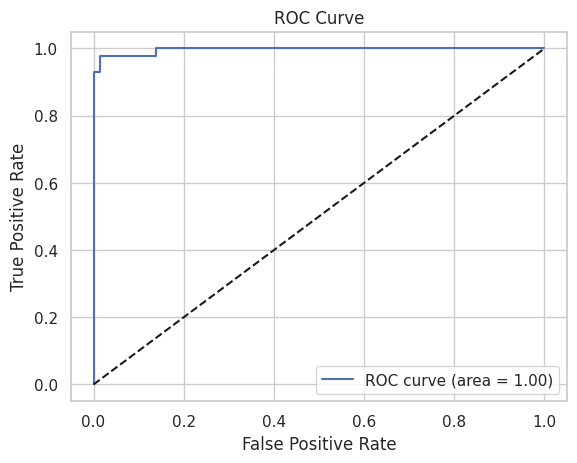

ROC-AUC Score: 0.996031746031746


In [17]:
fpr, tpr, thresh = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


In [18]:
custom_threshold = 0.30 
y_pred_custom = (y_proba >= custom_threshold).astype(int)
print("Custom Threshold Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))


Custom Threshold Confusion Matrix:
[[71  1]
 [ 1 41]]
Precision: 0.9761904761904762
Recall: 0.9761904761904762


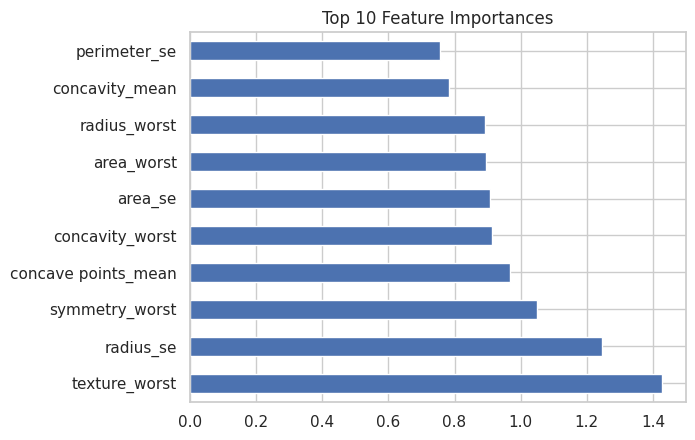

In [19]:
# Coefficients plot
coefs = pd.Series(log_reg.coef_[0], index=X.columns)
coefs.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()
